
Perform analysis on the transferability score 


In [2]:
import matplotlib.pyplot as plt
from math import log, sqrt
import os
import pandas as pd
from statistics import median

In [3]:
"""
Color map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score

Wasserstein distance is calculated as the final step error from Sinkhorn OT
"""


'\nColor map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score\n\nWasserstein distance is calculated as the final step error from Sinkhorn OT\n'

In [4]:
output_dir = os.path.join(os.path.expanduser("~"), f"OTTEHR/outputs/mimic")
print(f"Will save outputs to {output_dir}")
# summary_path = os.path.join(output_dir, "selected_summary_mimic.csv")
# summary_df = pd.read_csv(summary_path, header=0, index_col=0)
# label_codes = list(summary_df.index)


Will save outputs to /home/wanxinli/OTTEHR/outputs/mimic


In [5]:
""" 
Read each label score file
"""

stat_df = pd.DataFrame(columns=['label_code','trans_target_f1', 'delta_f1', 'trans_target_accuracy', 'delta_accuracy', 'div_score', 'w_dist', 'log_w_dist'])
stat_df = stat_df.set_index('label_code')
div_score_max = 200
div_score_min = 25

for file in os.listdir(output_dir):
    if file.endswith('OT_score.csv') and 'exp3' in file:
        code = file.split('_')[1]
        code_path = os.path.join(output_dir,file)
        code_df = pd.read_csv(code_path, header=0, index_col=None)
        med_transfer_score = median(list(code_df['transfer_score']))
        if med_transfer_score < div_score_min or med_transfer_score > div_score_max:
            continue
        stat_df.at[code, 'div_score'] = med_transfer_score
        stat_df.at[code, 'inverse_div_score'] = 1/stat_df.at[code, 'div_score']
        stat_df.at[code, 'w_dist'] = median(list(code_df['w_dist']))
        stat_df.at[code, 'sqrt_w_dist'] = sqrt(stat_df.at[code, 'w_dist'])
        stat_df.at[code, 'log_w_dist'] = log(stat_df.at[code, 'w_dist'])
        stat_df.at[code, 'inverse_log_w_dist'] = 1/stat_df.at[code, 'log_w_dist']
        stat_df.at[code, 'trans_target_f1'] = median(list(code_df['trans_target_f1']))
        stat_df.at[code, 'delta_f1'] = stat_df.at[code, 'trans_target_f1'] - median(list(code_df['target_f1']))
        stat_df.at[code, 'trans_target_accuracy'] = median(list(code_df['trans_target_accuracy']))
        stat_df.at[code, 'delta_accuracy'] = stat_df.at[code, 'trans_target_accuracy'] - median(list(code_df['source_accuracy']))



In [6]:
stat_path = "selected_code_stat.csv"
stat_df.to_csv(os.path.join(output_dir, stat_path), index=True, header=True)
stat_df

,trans_target_f1,delta_f1,trans_target_accuracy,delta_accuracy,div_score,w_dist,log_w_dist,inverse_div_score,sqrt_w_dist,inverse_log_w_dist
label_code,,,,,,,,,,
V45.11,0.882962,-0.042426,0.88125,-0.10875,42.179796,0.0,-18.527335,0.023708,0.000095,-0.053974
041.4,0.605546,0.00423,0.6125,-0.3125,144.272391,0.0,-18.590577,0.006931,0.000092,-0.053791
770.89,0.906503,0.012194,0.904167,-0.030833,32.385155,0.0,-18.5365,0.030878,0.000094,-0.053948
294.10,0.547417,-0.004761,0.5625,-0.2575,124.889946,0.0,-18.606499,0.008007,0.000091,-0.053745
276.52,0.564752,0.019297,0.575,-0.2325,122.863476,0.0,-18.564423,0.008139,0.000093,-0.053866
...,...,...,...,...,...,...,...,...,...,...
585.9,0.73886,-0.034526,0.74375,-0.19125,87.258202,0.0,-18.590376,0.011460,0.000092,-0.053791
286.6,0.681319,-0.012194,0.69375,-0.19125,97.866379,0.0,-18.565239,0.010218,0.000093,-0.053864
518.81,0.582609,0.004927,0.595833,-0.254167,128.075337,0.0,-18.586731,0.007808,0.000092,-0.053802


0.023708033124673955
0.006931333090307555
0.03087834549218404
0.008007049672712053
0.008139115306565805
0.006880555917261403
0.00887085437338075
0.008220573677145872
0.00860534601746383
0.00936181226456452
0.007794480107111427
0.008456239636777236
0.0068608062551408595
0.008037389759310757
0.039257806273103026
0.02591755877545322
0.006109108393287631
0.0074889190777118475
0.00857487358512767
0.006007575855080774
0.00878651442074242
0.0094338304025028
0.0072419350996125904
0.007297407907370768
0.006630168658278163
0.0070662132853124065
0.006887006043504628
0.008375013981529492
0.023046011795005775
0.00669033162746901
0.008150275594867902
0.007950879532532857
0.007526938963241723
0.00711694956795096
0.008667016242092996
0.008199073592403898
0.00749821054376533
0.00904668697183144
0.007600250972710023
0.00846789304035217
0.009786831788502834
0.006181642816908565
0.006652407203789497
0.010096622995319713
0.007319123480955382
0.008149488939279465
0.008449905016412249
0.006398956893925769
0.

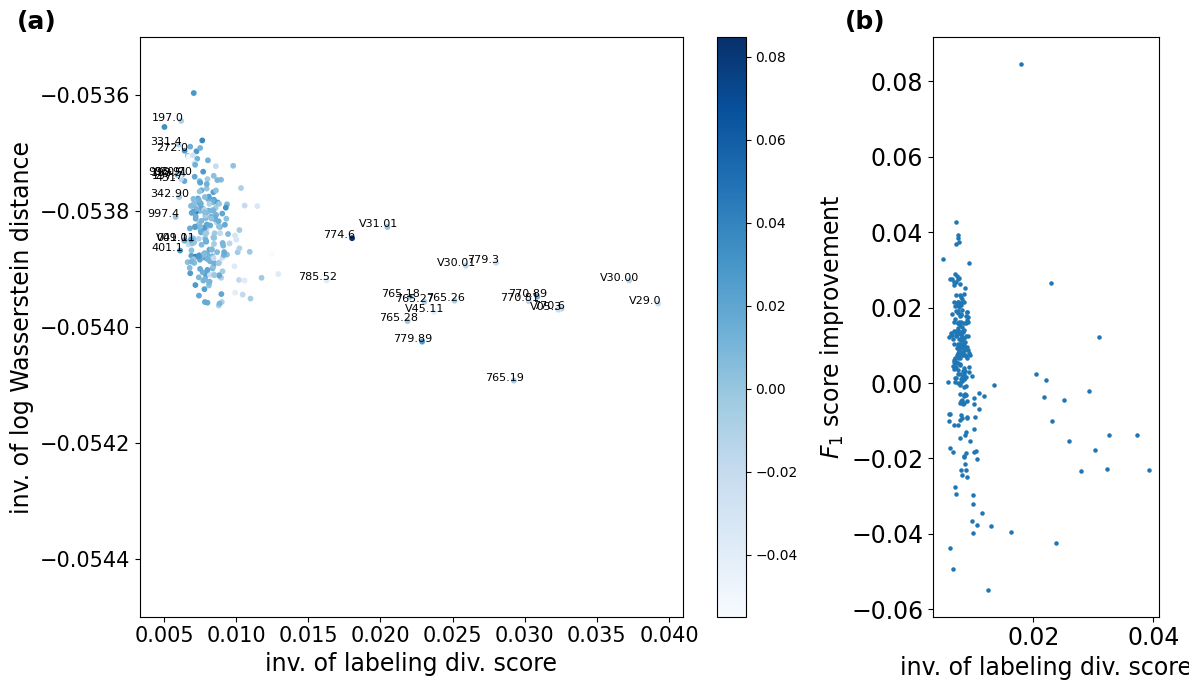

In [10]:
# plt.figure(figsize=[12,5])
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
fig.set_figwidth(12)
fig.set_figheight(7)


# plt.subplot(1,2,1)
textsize = 17
x = list(stat_df['inverse_div_score'])
y =  list(stat_df['inverse_log_w_dist'])

sc = ax1.scatter(x, y, s=10, c=list(stat_df['delta_f1']), cmap=plt.cm.Blues)
texts = list(stat_df.index)
valid_texts = ['V30.00', '765.27', '774.2', '413.9', '411.1', '410.41', '410.11', '291.81', \
              'V31.01', '765.18', 'V45.11', '765.28', '774.6', 'V30.01', '770.89', '765.26', '770.6',\
                 '770.81', 'V05.3', '779.81', '770.6']

for i, _ in enumerate(texts):
    print(x[i])
    if not (x[i] < 0.0065 or x[i] > 0.0145):
        texts[i] = ''
for i in range(len(x)):
    ax1.annotate(texts[i], (x[i]-0.002, y[i]), fontsize=8)
        
ax1.set_xlabel('inv. of labeling div. score', fontsize=textsize)
ax1.set_ylabel('inv. of log Wasserstein distance', fontsize=textsize)
ax1.set_ylim(-0.0545, -0.0535)
ax1.tick_params(labelsize=15)
plt.colorbar(sc, ax=ax1)
ax1.set_title(r'(a)', x=-0.19, fontweight="bold", fontsize=18)


# plt.subplot(1,2,2)
x = list(stat_df['inverse_div_score'])
y = list(stat_df['delta_f1'])
ax2.scatter(x, y, s=5)
ax2.set_xlabel('inv. of labeling div. score', fontsize=textsize)
ax2.set_ylabel(r'$F_1$ score improvement', fontsize=textsize)
ax2.tick_params(labelsize=textsize)
for i, _ in enumerate(texts):
    if not y[i] > 0.83:
        texts[i] = ''
for i in range(len(x)):
    if texts[i] != "":
        print(texts[i])
    ax2.annotate(texts[i], (x[i], y[i]), fontsize=8)

ax2.set_title(r'(b)', x=-0.30, fontweight="bold", fontsize=18)
plt.tight_layout()

# fig_path = os.path.join(output_dir, "exp3_w_dist.pdf")
# plt.savefig(fig_path, bbox_inches = 'tight')
plt.show()



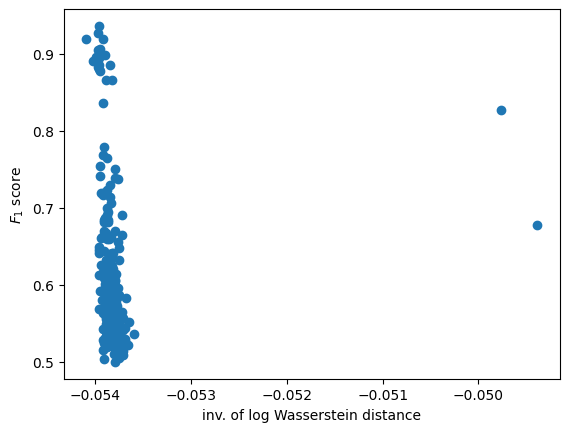

In [19]:
x = list(stat_df['inverse_log_w_dist'])
y = list(stat_df['trans_target_f1'])
plt.scatter(x, y)
plt.xlabel('inv. of log Wasserstein distance')
plt.ylabel(r'$F_1$ score')
plt.show()

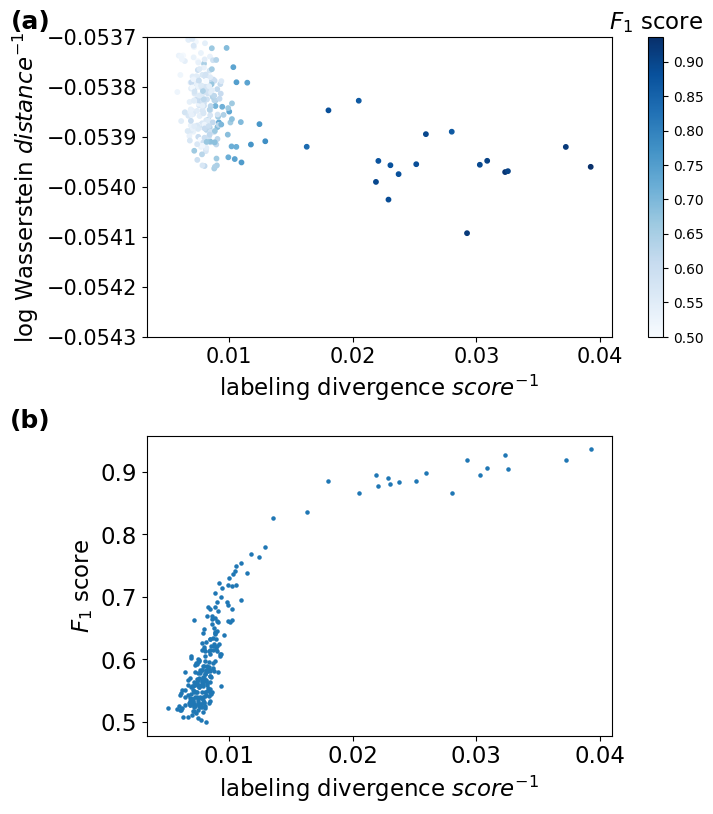

In [12]:
"""
Plot without annotation
"""

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 1]}, constrained_layout=True)
fig.set_figwidth(7)
fig.set_figheight(8)


# plt.subplot(1,2,1)
textsize = 16.5
x = list(stat_df['inverse_div_score'])
y =  list(stat_df['inverse_log_w_dist'])

sc = ax1.scatter(x, y, s=10, c=list(stat_df['trans_target_f1']), cmap=plt.cm.Blues)
texts = list(stat_df.index)

        
ax1.set_xlabel(r'labeling divergence $score^{-1}$', fontsize=textsize)
ax1.set_ylabel(r'log Wasserstein $distance^{-1}$', fontsize=textsize)
ax1.set_ylim(-0.0543, -0.0537)
ax1.tick_params(labelsize=15)
cbar = fig.colorbar(sc, ax=ax1)
# cbar.set_label(r'$F_1$ score', rotation=270)
cbar.ax.set_title(r'$F_1$ score', fontsize=textsize)

ax1.set_title(r'(a)', x=-0.25, fontweight="bold", fontsize=18)


# plt.subplot(1,2,2)
x = list(stat_df['inverse_div_score'])
y = list(stat_df['trans_target_f1'])
ax2.scatter(x, y, s=5)
ax2.set_xlabel(r'labeling divergence $score^{-1}$', fontsize=textsize)
ax2.set_ylabel(r'$F_1$ score', fontsize=textsize)
ax2.tick_params(labelsize=textsize)


ax2.set_title(r'(b)', x=-0.25, fontweight="bold", fontsize=18)
# plt.tight_layout()

fig_path = os.path.join(output_dir, "exp3_rel_vertical.pdf")
# plt.savefig(fig_path, bbox_inches = 'tight')
plt.show()



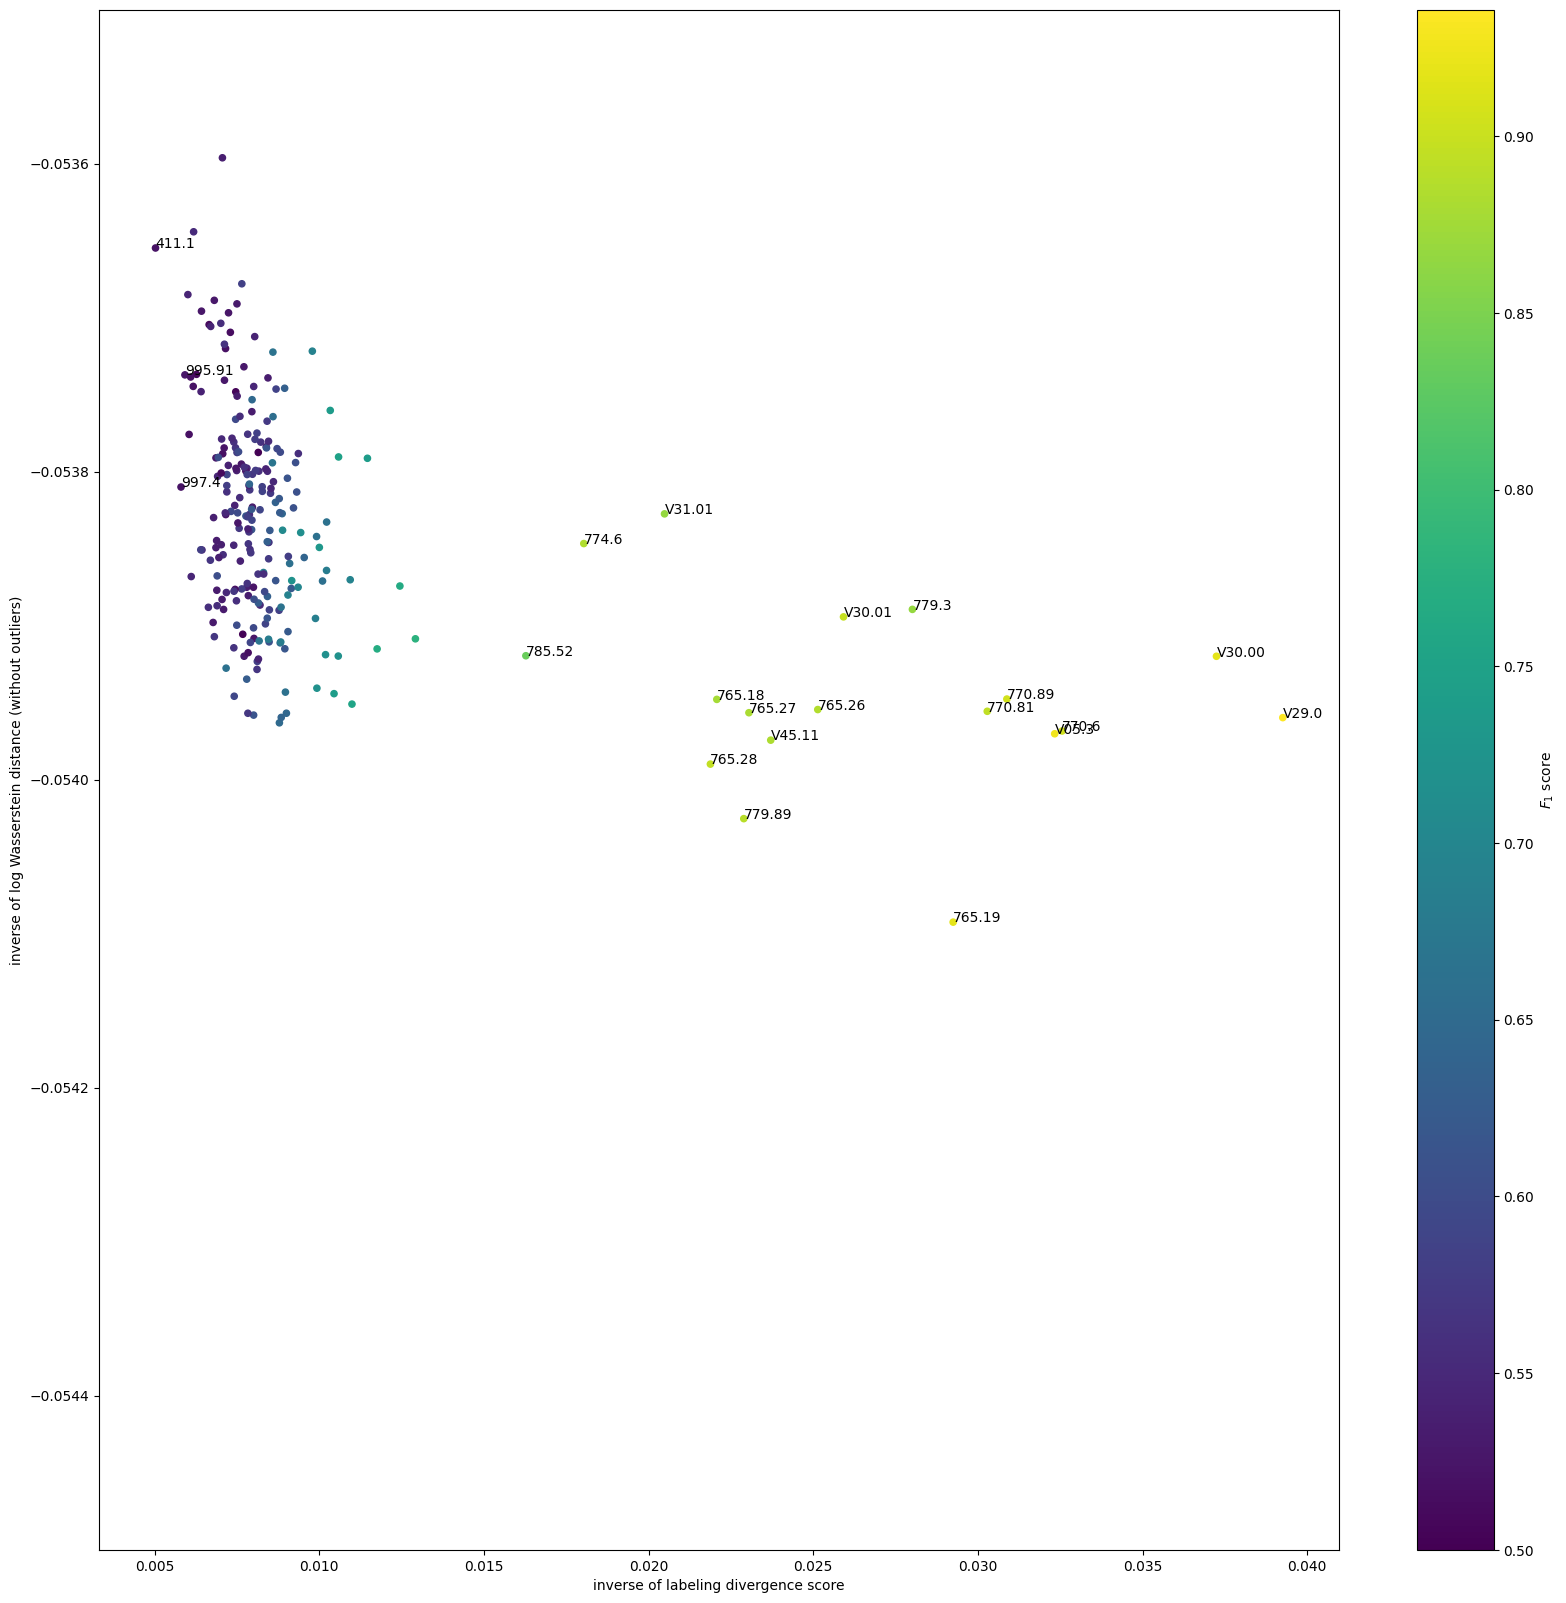

In [13]:
""" 
Examining the ICD code on top left and right right
"""

plt.figure(figsize=[20, 20])
texts = list(stat_df.index)
valid_texts = ['V30.00', '765.27', '774.2', '413.9', '411.1', '410.41', '780.57', '410.11', '593.9', '291.81', \
              '250.50', 'V31.01', '765.18', 'V45.11', '765.28', '774.6', 'V30.01', '769', '770.89', '765.26', '770.6',\
                 'V29.0', '770.81', 'V05.3', '779.81', '770.6']

# for i, _ in enumerate(texts):
#     if texts[i].startswith('197') or texts[i].startswith('198'):
#         continue
#     if texts[i] not in valid_texts:
#         texts[i] = ''


x = list(stat_df['inverse_div_score'])
y =  list(stat_df['inverse_log_w_dist'])
for i, _ in enumerate(texts):
    if not (x[i] < 0.006 or x[i] > 0.0145):
        texts[i] = ''

plt.scatter(x, y, s=20, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
for i in range(len(x)):
    plt.annotate(texts[i], (x[i]-1e-6, y[i]), fontsize=10)
plt.xlabel('inverse of labeling divergence score')
plt.ylabel('inverse of log Wasserstein distance (without outliers)')
plt.ylim(-0.0545, -0.0535)



plt.colorbar(label=r'$F_1$ score')

plt.show()

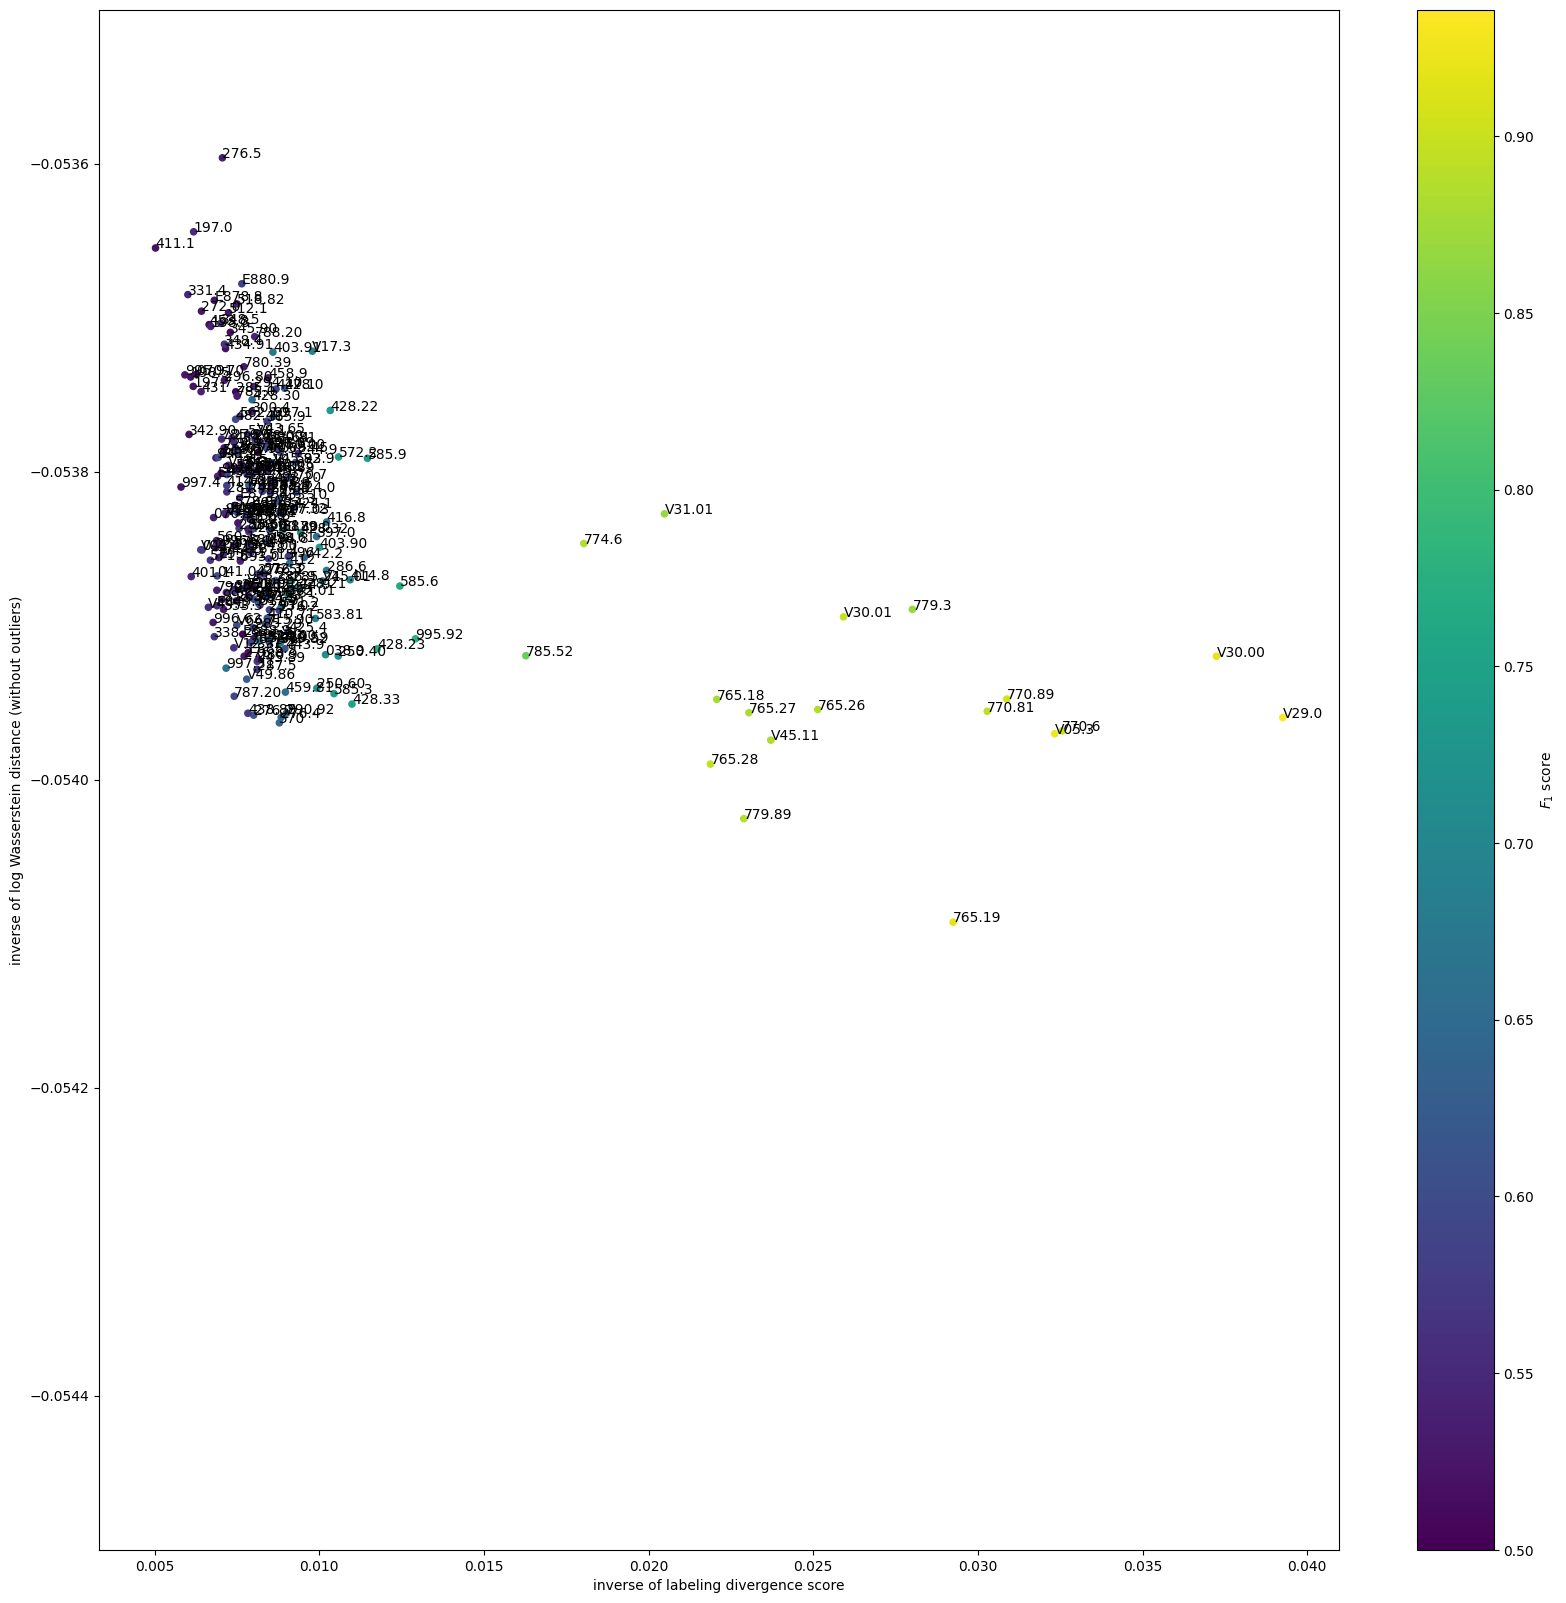

In [14]:
""" 
Examining the ICD code on top left and right right
"""

plt.figure(figsize=[20, 20])
texts = list(stat_df.index)
valid_texts = ['765.27', '774.2', '413.9', '411.1', '410.41', '441.2', '780.57', '410.11', '593.9', '291.81', \
              '250.50', 'V31.01', '765.18', 'V45.11', '765.28', '774.6', 'V30.01', '769', '770.89', '765.26', '770.6'\
                'V30.00', 'V29.0', '770.81', 'V05.3', '779.81']


x = list(stat_df['inverse_div_score'])
y =  list(stat_df['inverse_log_w_dist'])
plt.scatter(x, y, s=20, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
for i in range(len(x)):
    plt.annotate(texts[i], (x[i], y[i]), fontsize=10)
plt.xlabel('inverse of labeling divergence score')
plt.ylabel('inverse of log Wasserstein distance (without outliers)')
plt.ylim(-0.0545, -0.0535)



plt.colorbar(label=r'$F_1$ score')

plt.show()